# NAIVE BAYES: INCOME DATASET

## Q1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

## Q2 Import dataset

In [2]:
a=pd.read_csv('income_evaluation.csv')

## Q3. Explore the data to gain insights about the data

In [3]:
a.shape

(32561, 15)

In [4]:
a.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
a.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
a.columns=a.columns.str.strip()
a.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [7]:
a.rename(columns={'education-num':'education_num','marital-status':'marital_status','capital-gain':'capital_gain','capital-loss':'capital_loss','hours-per-week':'hours_per_week','native-country':'native_country'},inplace=True)

In [8]:
a.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

<Axes: >

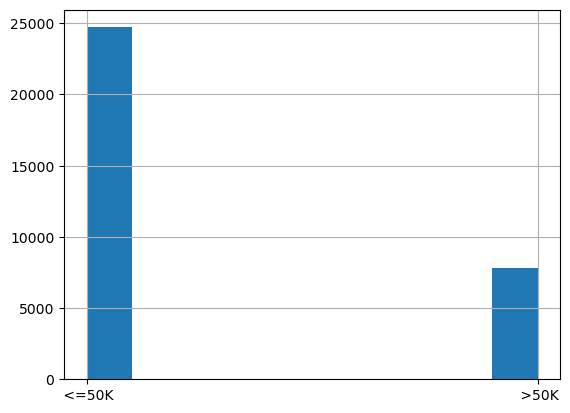

In [9]:
a['income'].hist()

([<matplotlib.patches.Wedge at 0x1b8bf8d2f10>,
 [Text(-0.7999477838977984, 0.7550387692277803, '<=50'),
  Text(0.7999477838977981, -0.7550387692277808, '>=50')],
 [Text(-0.43633515485334456, 0.4118393286696983, '76%'),
  Text(0.43633515485334434, -0.4118393286696986, '24%')])

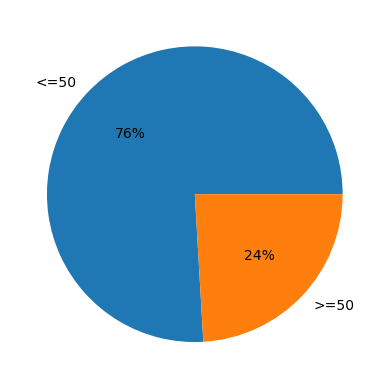

In [10]:
plt.pie(a['income'].value_counts()/len(a)*100,labels=['<=50','>=50'],autopct='%1.0f%%')

In [11]:
a.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
a.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
n=['object']
f=a.select_dtypes(include=n)
for i in f:
    print(f[i].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [14]:
a['workclass']=a['workclass'].str.strip()
a['occupation']=a['occupation'].str.strip()
a['native_country']=a['native_country'].str.strip()

In [15]:
a=a.replace('?',np.nan)

In [16]:
a['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

<Axes: >

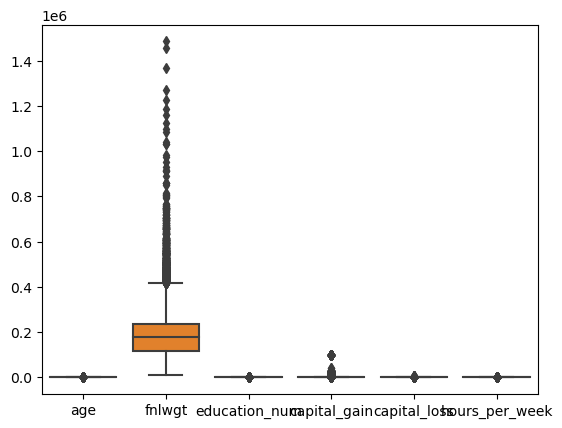

In [17]:
sns.boxplot(data=a)

In [18]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
a.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Q4. Check the distribution of variables

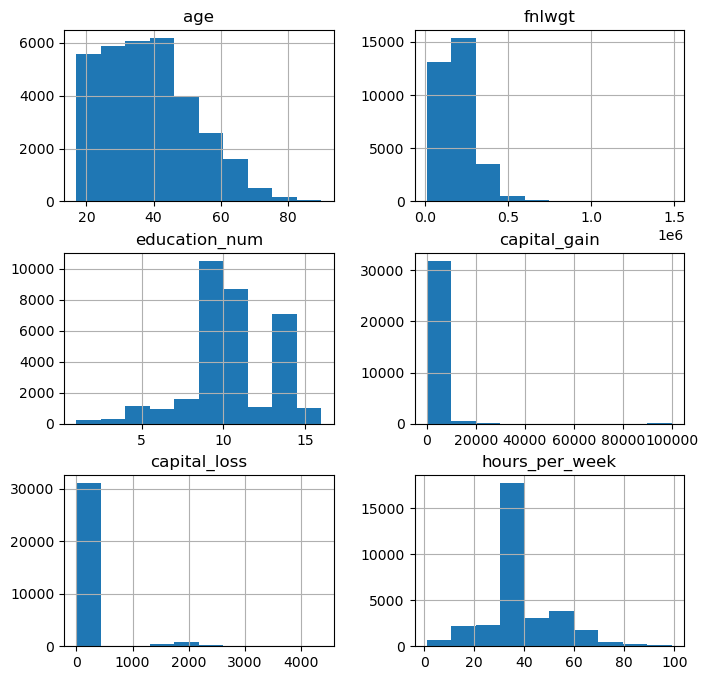

In [20]:
a.hist(figsize=(8,8))
plt.show()

## Q5. Feature Scaling

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a['workclass']=le.fit_transform(a['workclass'])
a['education']=le.fit_transform(a['education'])
a['occupation']=le.fit_transform(a['occupation'])
a['relationship']=le.fit_transform(a['relationship'])
a['native_country']=le.fit_transform(a['native_country'])

In [22]:
a=pd.get_dummies(a, columns = ['marital_status', 'race','sex'])
a.head()

,age,workclass,fnlwgt,education,education_num,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,income,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,6,77516,9,13,0,1,2174,0,40,38,<=50K,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,50,5,83311,9,13,3,0,0,0,13,38,<=50K,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,38,3,215646,11,9,5,1,0,0,40,38,<=50K,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,3,234721,1,7,5,0,0,0,40,38,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,28,3,338409,9,13,9,5,0,0,40,4,<=50K,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
a['income']=oe.fit_transform(a[['income']])

In [24]:
y=a['income']
a.drop('income',axis=1,inplace=True)

In [25]:
x=a
x

,age,workclass,fnlwgt,education,education_num,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,marital_status_ Divorced,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,marital_status_ Married-spouse-absent,marital_status_ Never-married,marital_status_ Separated,marital_status_ Widowed,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,6,77516,9,13,0,1,2174,0,40,38,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,50,5,83311,9,13,3,0,0,0,13,38,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,38,3,215646,11,9,5,1,0,0,40,38,1,0,0,0,0,0,0,0,0,0,0,1,0,1
3,53,3,234721,1,7,5,0,0,0,40,38,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,28,3,338409,9,13,9,5,0,0,40,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,12,5,0,0,38,38,0,0,1,0,0,0,0,0,0,0,0,1,1,0
32557,40,3,154374,11,9,6,0,0,0,40,38,0,0,1,0,0,0,0,0,0,0,0,1,0,1
32558,58,3,151910,11,9,0,4,0,0,40,38,0,0,0,0,0,0,1,0,0,0,0,1,1,0
32559,22,3,201490,11,9,0,3,0,0,20,38,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 0.03067056,  1.65841165, -1.06361075, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.83710898,  1.02630576, -1.008707  , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [-0.04264203, -0.23790601,  0.2450785 , ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       ...,
       [ 1.42360965, -0.23790601, -0.35877741, ...,  0.4130197 ,
         1.42233076, -1.42233076],
       [-1.21564337, -0.23790601,  0.11095988, ...,  0.4130197 ,
        -0.70307135,  0.70307135],
       [ 0.98373415,  0.39419988,  0.92989258, ...,  0.4130197 ,
         1.42233076, -1.42233076]])

## Q6. Split data into separate training and test set

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2,random_state=42)

## Q7. Model training

In [28]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

##  Q8. Predict the results

In [29]:
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)
y_pred_test

array([0., 0., 0., ..., 1., 0., 0.])

## Q9 Check the accuracy score                                                                                                          Q10 Compare the train-set and test-set accuracy

In [30]:
accuracy_test= accuracy_score(y_test, y_pred_test)
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test,accuracy_train

(0.7620144326731153, 0.7563344594594594)

## Q11. Visualize confusion matrix with seaborn heatmap

In [32]:
cm = confusion_matrix(y_test, y_pred_test)

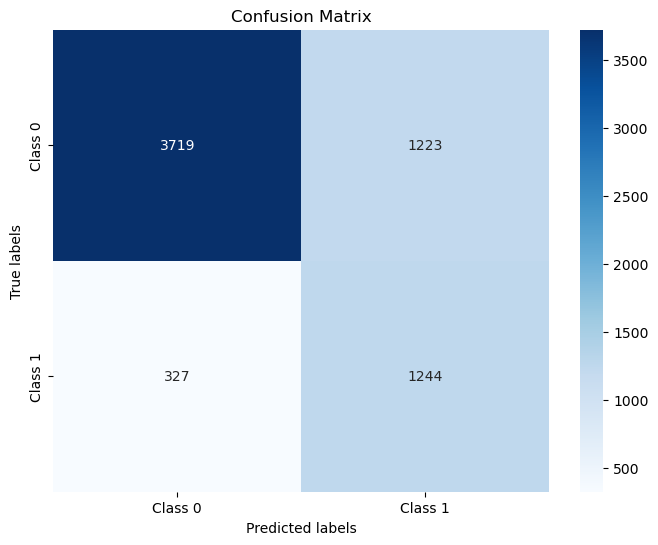

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Q12 Generate Classification error

In [34]:
classification_error = 1 - accuracy_test
print("Classification Error:", classification_error)

Classification Error: 0.2379855673268847


## Q13. Generate Classification Report

In [37]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.83      4942
         1.0       0.50      0.79      0.62      1571

    accuracy                           0.76      6513
   macro avg       0.71      0.77      0.72      6513
weighted avg       0.82      0.76      0.78      6513



## Q14. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [38]:
class_probabilities = model.predict_proba(X_test)
probabilities_df = pd.DataFrame(class_probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])
print(probabilities_df)

      Probability_Class_0  Probability_Class_1
0                0.999994             0.000006
1                0.957434             0.042566
2                0.958731             0.041269
3                0.999992             0.000008
4                0.990713             0.009287
...                   ...                  ...
6508             0.999927             0.000073
6509             0.019373             0.980627
6510             0.000000             1.000000
6511             0.999995             0.000005
6512             0.999978             0.000022

[6513 rows x 2 columns]


## Q15  Plot histogram of predicted probabilities

array([[<Axes: title={'center': 'Probability_Class_0'}>,
        <Axes: title={'center': 'Probability_Class_1'}>]], dtype=object)

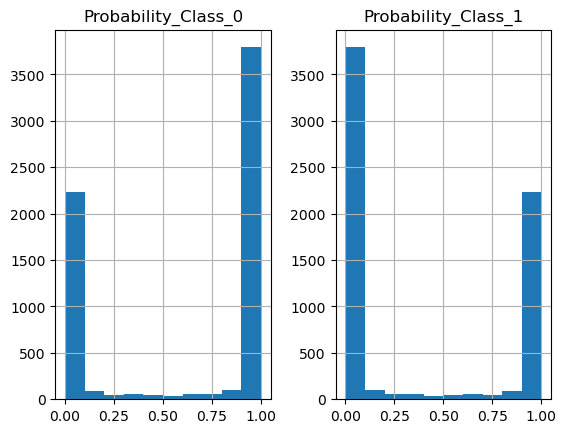

In [39]:
probabilities_df.hist()

## Q16. Plot ROC Curve

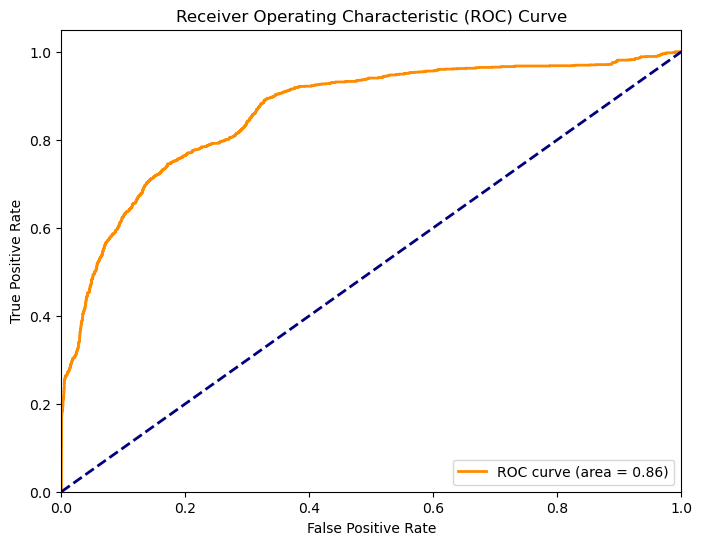

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Q17. Compute ROC AUC

In [41]:
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.861997129786362


## Q18. Calculate cross-validated ROC AUC

In [42]:
from sklearn.model_selection import cross_val_score
cv_roc_auc_scores = cross_val_score(model, x, y, cv=5, scoring='roc_auc')

print("Cross-validated ROC AUC scores:", cv_roc_auc_scores)
print("Mean ROC AUC score:", cv_roc_auc_scores.mean())

Cross-validated ROC AUC scores: [0.82689732 0.82751846 0.83572311 0.82600612 0.83862429]
Mean ROC AUC score: 0.8309538597503863


## Q19.  Applying 10-Fold Cross Validation

In [48]:
cv_scores = cross_val_score(model, x_scaled, y, cv=10)
print("Cross-validated scores:", cv_scores)

Cross-validated scores: [0.76450722 0.75460688 0.76105651 0.75214988 0.75276413 0.76597052
 0.74938575 0.76320639 0.76566339 0.76504914]


## Q20. Compute the Average cross-validation score

In [49]:
print("Mean score:", np.mean(cv_scores))


Mean score: 0.7594359795081317
